## Role of visualization:
- Helps to understand the relations in specific context.

## Visualization can be:
- **Conceptual:** without data.
- **Data-driven:** we have a data supportive conclusion.

Download the data set from this link:
https://www.kaggle.com/worldbank/world-development-indicators

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
!ls ../../world-development-indicators

Country.csv	  database.sqlite  hashes.txt	   Series.csv
CountryNotes.csv  Footnotes.csv    Indicators.csv  SeriesNotes.csv


In [3]:
data = pd.read_csv('../../world-development-indicators/Indicators.csv')

print(data.shape)

data.head(10)

(5656458, 6)


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [4]:
countries = data['CountryName'].unique().tolist()

print(len(countries))
print(countries[:10])

247
['Arab World', 'Caribbean small states', 'Central Europe and the Baltics', 'East Asia & Pacific (all income levels)', 'East Asia & Pacific (developing only)', 'Euro area', 'Europe & Central Asia (all income levels)', 'Europe & Central Asia (developing only)', 'European Union', 'Fragile and conflict affected situations']


In [5]:
countryCodes = data['CountryCode'].unique().tolist()

print(len(countryCodes))
print(countryCodes[:10])

247
['ARB', 'CSS', 'CEB', 'EAS', 'EAP', 'EMU', 'ECS', 'ECA', 'EUU', 'FCS']


In [6]:
indicators = data['IndicatorName'].unique().tolist()

print(len(indicators))
print(indicators[:10])

1344
['Adolescent fertility rate (births per 1,000 women ages 15-19)', 'Age dependency ratio (% of working-age population)', 'Age dependency ratio, old (% of working-age population)', 'Age dependency ratio, young (% of working-age population)', 'Arms exports (SIPRI trend indicator values)', 'Arms imports (SIPRI trend indicator values)', 'Birth rate, crude (per 1,000 people)', 'CO2 emissions (kt)', 'CO2 emissions (metric tons per capita)', 'CO2 emissions from gaseous fuel consumption (% of total)']


In [7]:
years = data['Year'].unique().tolist()

print(min(years), max(years))
print(years[:10])

1960 2015
[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969]


In [8]:
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'USA'

mask_co2 = data['IndicatorName'].str.contains(hist_indicator)
mask_usa = data['CountryCode'].str.contains(hist_country)

stage = data[mask_co2 & mask_usa]

stage.shape

(52, 6)

In [9]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


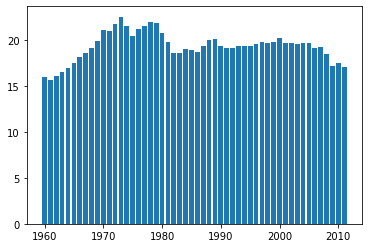

In [10]:
plt.bar(stage['Year'], stage['Value'])
plt.show()

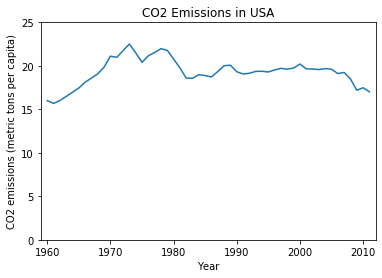

In [11]:
plt.plot(stage['Year'].values, stage['Value'].values)

plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

plt.title('CO2 Emissions in USA')

# to make the plot is not misleading
plt.axis([1959,2012, 0,25])

plt.show()

In [12]:
stage['IndicatorName'][-2:]

5018038    CO2 emissions (metric tons per capita)
5194727    CO2 emissions (metric tons per capita)
Name: IndicatorName, dtype: object

In [13]:
print(type(stage['Year'].values), type(stage['Year']))

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>


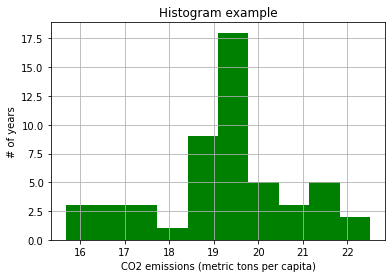

In [14]:
# normed is depreciated
plt.hist(stage['Value'].values, 10, density=False, facecolor= 'green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of years')
plt.title('Histogram example')

plt.grid(True)

plt.show()

In [15]:
hist_year = 2011

mask_year = data['Year'].isin([hist_year])

co2_2011 = data[mask_co2 & mask_year]
print(co2_2011.shape)
co2_2011.head()

(232, 6)


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


5194727    17.020216
Name: Value, dtype: float64


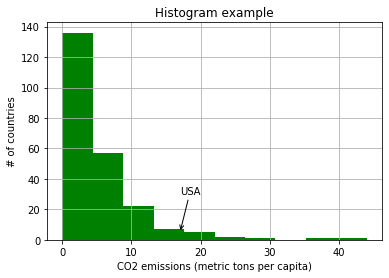

In [16]:
fig, ax = plt.subplots()

usa_value = co2_2011[co2_2011['CountryCode'].str.contains(hist_country)]['Value']

print(usa_value)

ax.annotate('USA', xy=(usa_value, 5), xycoords='data', xytext=(usa_value, 30), textcoords='data',
           arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))


plt.hist(co2_2011['Value'].values, 10, density=False, facecolor= 'green')

plt.xlabel(co2_2011['IndicatorName'].iloc[0])
plt.ylabel('# of countries')
plt.title('Histogram example')

plt.grid(True)

plt.show()

In [20]:
hist_indicator2 = 'GDP per capita \(constant 2005'

mask_gdp = data['IndicatorName'].str.contains(hist_indicator2)

gdp_stage = data[mask_gdp & mask_usa]

gdp_stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657
77142,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,16276.426685
105760,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,16749.789436
134798,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,17476.822248


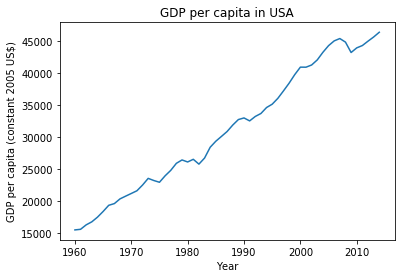

In [31]:
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])

plt.title('GDP per capita in USA')

# to make the plot is not misleading
# plt.axis([1959,2015, 0,50000])

plt.show()

In [32]:
print("GDP min year:", gdp_stage['Year'].min(), 'max:', gdp_stage['Year'].max())
print("CO2 min year:", stage['Year'].min(), 'max:', stage['Year'].max())

GDP min year: 1960 max: 2014
CO2 min year: 1960 max: 2011


In [33]:
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]
print(len(gdp_stage_trunc))
print(len(stage))

52
52


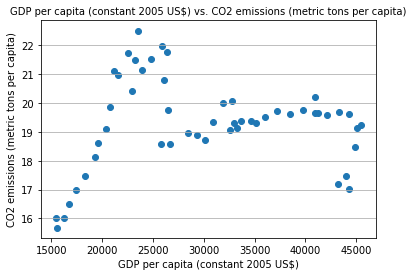

In [55]:
gdp_title = gdp_stage_trunc['IndicatorName'].iloc[0]
co2_title = stage['IndicatorName'].iloc[0]

fig, axis = plt.subplots()

axis.yaxis.grid(True)
axis.set_title(gdp_title + " vs. " + co2_title, fontsize=10)
axis.set_xlabel(gdp_title, fontsize=10)
axis.set_ylabel(co2_title, fontsize=10)

axis.scatter(gdp_stage_trunc['Value'], stage['Value'])
plt.show()

In [58]:
np.corrcoef(gdp_stage_trunc['Value'], stage['Value'])

array([[1.        , 0.07676005],
       [0.07676005, 1.        ]])

A correlation of .077 is a pretty weak.

In [66]:
print(len(data[mask_gdp]), len(data[mask_co2]))

avg_gdp = data[mask_gdp].groupby('Year').mean()
avg_co2 = data[mask_co2].groupby('Year').mean()

9951 10599


In [65]:
avg_gdp.head()

,Value
Year,
1960,4016.879352
1961,4111.926049
1962,4253.999365
1963,4398.185605
1964,4631.362571


In [74]:
print(avg_gdp.index)

print("GDP min year:", avg_gdp.index.min(), 'max:', avg_gdp.index.max())
print("CO2 min year:", avg_co2.index.min(), 'max:', avg_co2.index.max())

Int64Index([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
            1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
            1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
            1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014],
           dtype='int64', name='Year')
GDP min year: 1960 max: 2014
CO2 min year: 1960 max: 2011


In [75]:
avg_gdp_trunc = avg_gdp[avg_gdp.index < 2012]

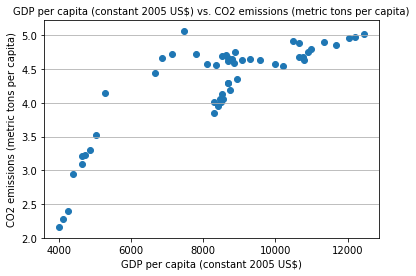

In [76]:
fig, axis = plt.subplots()

axis.yaxis.grid(True)
axis.set_title(gdp_title + " vs. " + co2_title, fontsize=10)
axis.set_xlabel(gdp_title, fontsize=10)
axis.set_ylabel(co2_title, fontsize=10)

axis.scatter(avg_gdp_trunc['Value'], avg_co2['Value'])
plt.show()

In [79]:
np.corrcoef(avg_gdp_trunc['Value'], avg_co2['Value'])

array([[1.        , 0.82986923],
       [0.82986923, 1.        ]])